In [1]:
import numpy as np

In [2]:
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')


In [3]:
print("Dimensions de ratings_train:", ratings_train.shape)
print("Dimensions de ratings_test:", ratings_test.shape)
print("Dimensions de namegenres:", namegenres.shape)
print("Dimensions de list_index_wanted:", list_index_wanted.shape)


Dimensions de ratings_train: (610, 4980)
Dimensions de ratings_test: (610, 4980)
Dimensions de namegenres: (4980, 2)
Dimensions de list_index_wanted: (31598, 2)


In [4]:
import numpy as np

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)  # Si le fichier contient des données de types variés
list_index_wanted = np.load('list_index_wanted.npy')

# Afficher un aperçu des données
print("Aperçu de ratings_train:", ratings_train[:5])  # Affiche les 5 premières lignes
print("Aperçu de ratings_test:", ratings_test[:5])    # Affiche les 5 premières lignes
print("Aperçu de namegenres:", namegenres[:5])        # Affiche les 5 premières lignes
print("Aperçu de list_index_wanted:", list_index_wanted[:5])  # Affiche les 5 premières lignes


Aperçu de ratings_train: [[ 4. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Aperçu de ratings_test: [[nan nan  4. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 4. nan nan ... nan nan nan]]
Aperçu de namegenres: [['Toy Story (1995)' 'Adventure|Animation|Children|Comedy|Fantasy']
 ['Jumanji (1995)' 'Adventure|Children|Fantasy']
 ['Grumpier Old Men (1995)' 'Comedy|Romance']
 ['Waiting to Exhale (1995)' 'Comedy|Drama|Romance']
 ['Father of the Bride Part II (1995)' 'Comedy']]
Aperçu de list_index_wanted: [[  0  42]
 [  0 237]
 [  0 250]
 [  0 261]
 [  0 265]]


In [5]:
# Compter le nombre de notes non-nulles dans chaque dataset
ratings_train_count = np.count_nonzero(~np.isnan(ratings_train))
ratings_test_count = np.count_nonzero(~np.isnan(ratings_test))

print(f"Nombre de notes dans ratings_train : {ratings_train_count}")
print(f"Nombre de notes dans ratings_test : {ratings_test_count}")


Nombre de notes dans ratings_train : 31598
Nombre de notes dans ratings_test : 31598


In [6]:
import numpy as np

def analyze_data(ratings_train, ratings_test, namegenres):
    # Afficher les formes des matrices
    print("Forme de la matrice d'entraînement:", ratings_train.shape)
    print("Forme de la matrice de test:", ratings_test.shape)
    print("Nombre de films et leurs genres:", namegenres.shape)

    # Calcul du pourcentage de valeurs manquantes dans la matrice d'entraînement
    total_elements = ratings_train.size
    missing_elements = np.isnan(ratings_train).sum()
    missing_percentage = (missing_elements / total_elements) * 100
    print(f"\nPourcentage de valeurs manquantes dans train: {missing_percentage:.2f}%")

In [7]:
# Calculer le taux de valeurs manquantes dans la matrice de notation
num_missing = np.isnan(ratings_train).sum()
total_values = ratings_train.size
missing_rate = (num_missing / total_values) * 100

print(f"Taux de valeurs manquantes dans ratings_train: {missing_rate:.2f}%")


Taux de valeurs manquantes dans ratings_train: 98.96%


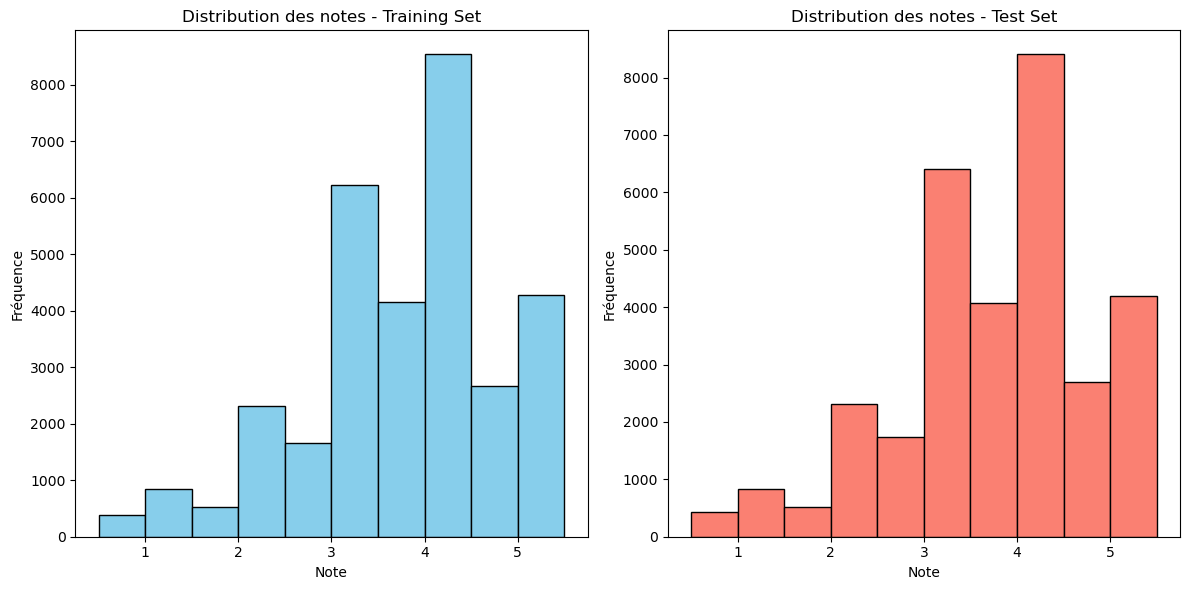

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Remplacer les NaN par 0 pour faciliter la visualisation
ratings_train_non_nan = np.nan_to_num(ratings_train, nan=0).flatten()
ratings_test_non_nan = np.nan_to_num(ratings_test, nan=0).flatten()

# Filtrer les notes supérieures à 0 (supposant que 0 signifie absence de note)
ratings_train_non_nan = ratings_train_non_nan[ratings_train_non_nan > 0]
ratings_test_non_nan = ratings_test_non_nan[ratings_test_non_nan > 0]

# Créer l'histogramme
plt.figure(figsize=(12, 6))

# Histogramme pour ratings_train
plt.subplot(1, 2, 1)
plt.hist(ratings_train_non_nan, bins=np.arange(0.5, 6, 0.5), color='skyblue', edgecolor='black')
plt.title("Distribution des notes - Training Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

# Histogramme pour ratings_test
plt.subplot(1, 2, 2)
plt.hist(ratings_test_non_nan, bins=np.arange(0.5, 6, 0.5), color='salmon', edgecolor='black')
plt.title("Distribution des notes - Test Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


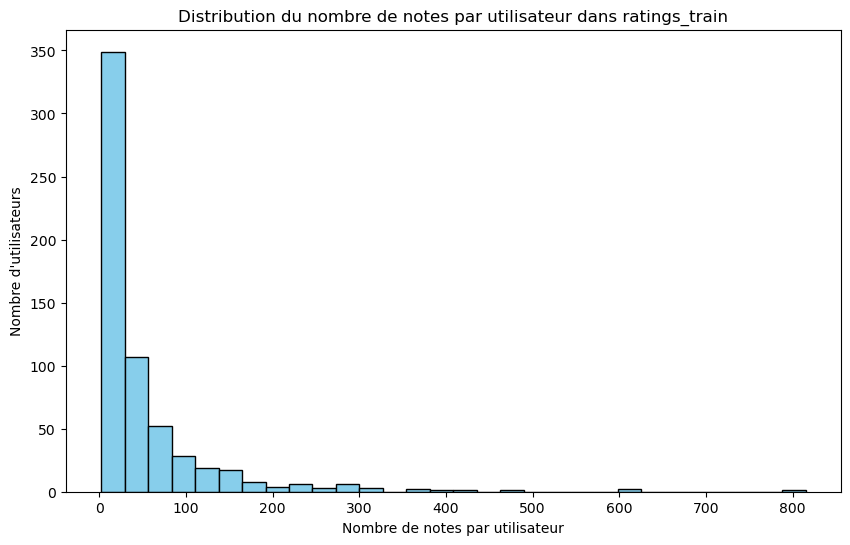

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre de notes par utilisateur dans ratings_train
# Assumant que chaque ligne est un utilisateur
notes_par_utilisateur = np.count_nonzero(~np.isnan(ratings_train), axis=1)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(notes_par_utilisateur, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de notes par utilisateur")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de notes par utilisateur dans ratings_train")
plt.show()


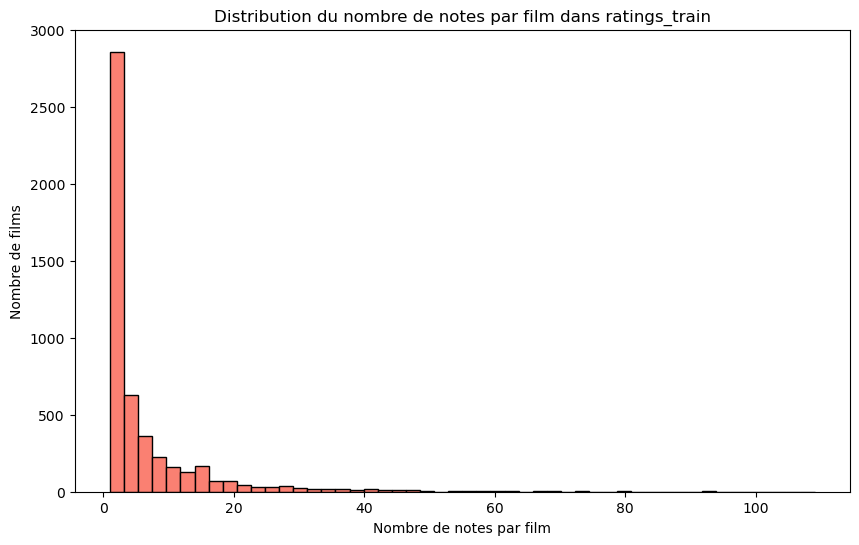

In [10]:

# Compter le nombre de notes par film (colonne)
film_counts = np.count_nonzero(~np.isnan(ratings_train), axis=0)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(film_counts, bins=50, color='salmon', edgecolor='black')
plt.xlabel("Nombre de notes par film")
plt.ylabel("Nombre de films")
plt.title("Distribution du nombre de notes par film dans ratings_train")
plt.show()


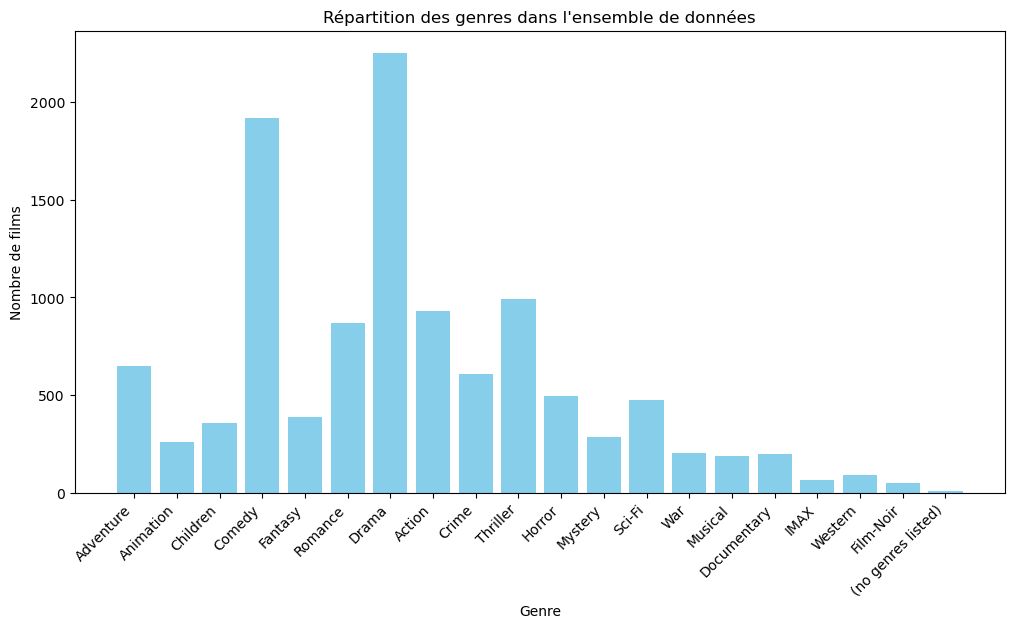

In [11]:
from collections import Counter

# Extraire les genres et compter leur fréquence
genres = [genre for sublist in namegenres[:, 1] for genre in sublist.split('|')]
genre_counts = Counter(genres)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.title("Répartition des genres dans l'ensemble de données")
plt.show()

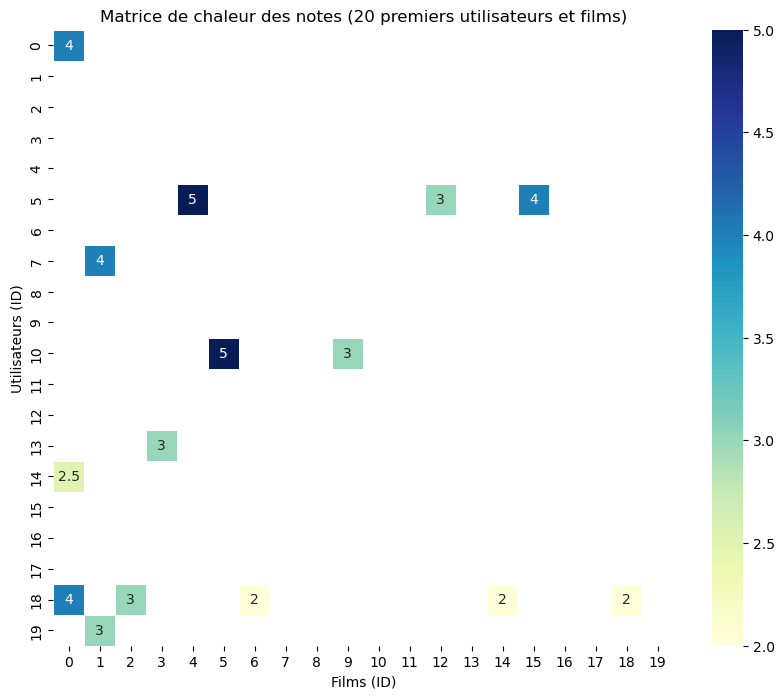

In [12]:
import seaborn as sns

# Extraire une sous-matrice de ratings_train pour les 20 premiers utilisateurs et les 20 premiers films
ratings_sample = ratings_train[:20, :20]

# Créer la matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_sample, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.xlabel("Films (ID)")
plt.ylabel("Utilisateurs (ID)")
plt.title("Matrice de chaleur des notes (20 premiers utilisateurs et films)")
plt.show()

In [13]:
import os

# Liste des fichiers à supprimer
files_to_delete = [
    "predicted_sparse_matrix_autorec.npz",
    "predicted_sparse_matrix_combined_svd_knn.npz",
    "predicted_sparse_matrix_dmf.npz",
    "predicted_sparse_matrix_hybrid_collab_content.npz",
    "predicted_sparse_matrix_knn_svd.npz",
    "predicted_sparse_matrix_laplacian.npz",
    "predicted_sparse_matrix_popularity.npz",
    "predicted_sparse_matrix_svd.npz"
]

# Suppression des fichiers
for file in files_to_delete:
    if os.path.exists(file):
        os.remove(file)
        print(f"{file} supprimé.")
    else:
        print(f"{file} n'existe pas.")


predicted_sparse_matrix_autorec.npz n'existe pas.
predicted_sparse_matrix_combined_svd_knn.npz supprimé.
predicted_sparse_matrix_dmf.npz n'existe pas.
predicted_sparse_matrix_hybrid_collab_content.npz supprimé.
predicted_sparse_matrix_knn_svd.npz n'existe pas.
predicted_sparse_matrix_laplacian.npz n'existe pas.
predicted_sparse_matrix_popularity.npz n'existe pas.
predicted_sparse_matrix_svd.npz n'existe pas.


# Méthode SVD

In [14]:
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

In [15]:
train_data = [
    (i+1, j+1, ratings_train_matrix[i, j])
    for i in range(ratings_train_matrix.shape[0])
    for j in range(ratings_train_matrix.shape[1])
    if ratings_train_matrix[i,j] != 0
]

In [16]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy

# Création du reader avec l'échelle de notation
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))

# Transformation de `train_data` en DataFrame avec les colonnes appropriées
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

# Chargement du dataset avec surprise
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [17]:
parameters = {"n_factors": [150, 200, 300], "reg_all": [0.01, 0.1, 0.2, 0.5, 0.8], "lr_all": [0.01, 0.02, 0.03, 0.04, 0.05, 0.09]}


In [18]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])


Meilleurs paramètres : {'n_factors': 200, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8872199473024016


In [19]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator["rmse"]

# Générer les prédictions pour les indices souhaités
predicted_ratings = []
for user_index, product_index in list_index_wanted:
    pred = best_model.predict(user_index, product_index)
    predicted_ratings.append((user_index, product_index, pred.est))

# Affichage des prédictions
for prediction in predicted_ratings:
    print(f"Utilisateur {prediction[0]}, Produit {prediction[1]}, Note prédite : {prediction[2]}")


Meilleurs paramètres : {'n_factors': 200, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8878141137467848
Utilisateur 0, Produit 42, Note prédite : 3.227213012962091
Utilisateur 0, Produit 237, Note prédite : 3.2812457262663117
Utilisateur 0, Produit 250, Note prédite : 3.56976346776772
Utilisateur 0, Produit 261, Note prédite : 3.121291897918076
Utilisateur 0, Produit 265, Note prédite : 3.467969259406966
Utilisateur 0, Produit 352, Note prédite : 3.6662327071910257
Utilisateur 0, Produit 372, Note prédite : 3.44885460299191
Utilisateur 0, Produit 387, Note prédite : 3.2555441178037987
Utilisateur 0, Produit 393, Note prédite : 3.7232851370677755
Utilisateur 0, Produit 421, Note prédite : 3.7090143687132255
Utilisateur 0, Produit 475, Note prédite : 3.821072258611303
Utilisateur 0, Produit 502, Note prédite : 3.2637683690350925
Utilisateur 0, Produit 555, Note prédite : 4.109527800407423
Utilisateur 0, Produit 572, Note prédite : 4.106991519152629
Utilisateur 0, Produit 585, Note p

In [20]:
import pandas as pd

# Création de test_data en tant que DataFrame directement avec les colonnes nécessaires
test_data = [
    (i + 1, j + 1, ratings_test_matrix[i, j])
    for i in range(ratings_test_matrix.shape[0])
    for j in range(ratings_test_matrix.shape[1])
    if ratings_test_matrix[i, j] != 0
]

# Conversion en DataFrame avec les colonnes 'user_id', 'item_id', 'rating'
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])

# Utilisation du DataFrame avec Dataset.load_from_df
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset()


In [21]:
from surprise import Dataset, Reader, accuracy
from sklearn.metrics import r2_score
import numpy as np
from surprise.model_selection import GridSearchCV

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()  # Création d'un vrai testset

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions = best_model.test(testset)

# Calcul du RMSE pour le jeu de test avec Surprise
rmse_with_mask_test_svd = accuracy.rmse(test_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test = np.array([pred.est for pred in test_predictions])
actual_ratings_test = np.array([pred.r_ui for pred in test_predictions])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test)
r2_with_mask_test_svd = r2_score(actual_ratings_test[mask_test], predicted_ratings_test[mask_test])

# Affichage des résultats
print("RMSE SVD (Test) :", rmse_with_mask_test_svd)
print("R² SVD (Test) :", r2_with_mask_test_svd)


RMSE: 0.9094
RMSE SVD (Test) : 0.9093853962976365
R² SVD (Test) : 0.23069914718911255


In [22]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Générer le trainset complet pour Surprise
trainset_full = train_dataset.build_full_trainset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble d'entraînement
train_predictions = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement avec Surprise
rmse_with_mask_train_svd = accuracy.rmse(train_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train = np.array([pred.est for pred in train_predictions])
actual_ratings_train = np.array([pred.r_ui for pred in train_predictions])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train)
r2_with_mask_train_svd = r2_score(actual_ratings_train[mask_train], predicted_ratings_train[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE SVD (Entraînement - Surprise) :", rmse_with_mask_train_svd)
print("R² SVD (Entraînement - Surprise) :", r2_with_mask_train_svd)


RMSE: 0.8106
RMSE SVD (Entraînement - Surprise) : 0.8106185847523073
R² SVD (Entraînement - Surprise) : 0.38373942662650773


In [23]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_with_mask_test_svd - rmse_with_mask_train_svd}")
print(f"Différence R² (test - entraînement) : {rmse_with_mask_test_svd - r2_with_mask_train_svd}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.09876681154532918
Différence R² (test - entraînement) : 0.5256459696711288


In [24]:
import numpy as np
import scipy.sparse as sp

# Charger les indices spécifiques de prédiction
list_index_wanted = np.load('list_index_wanted.npy')

# Créer une matrice creuse pour les prédictions SVD
predicted_sparse_matrix_svd = sp.lil_matrix((ratings_train_matrix.shape[0], ratings_train_matrix.shape[1]))

# Remplir la matrice creuse avec les prédictions pour les indices souhaités
for (user_id, item_id, rating_pred) in predicted_ratings:
    predicted_sparse_matrix_svd[user_id - 1, item_id - 1] = rating_pred  # Les indices sont ajustés pour l'indexation de numpy

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_svd_csr = predicted_sparse_matrix_svd.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_svd.npz", predicted_sparse_matrix_svd_csr)


In [25]:
# Charger la matrice prédite SVD et la liste des indices souhaités
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_svd.npz")

# Initialiser une liste pour les indices manquants
missing_indices_svd = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, item_id] == 0:
        missing_indices_svd.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices_svd:
    print("La matrice est correctement remplie avec tous les indices souhaités (SVD).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices_svd)}")
    print("Exemples d'indices manquants :", missing_indices_svd[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [3.87129363 3.51325009 3.16074562 0.         3.06654138 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.7552033  3.33362446]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.      

# Méthode Hybride (SVD + KNN avec pondération) 

In [26]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [27]:
# Charger les matrices de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Préparer les données pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [28]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)


In [29]:
# Définir les paramètres et faire un GridSearch pour KNNWithZScore
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [30]:
# Définir la pondération pour la combinaison des prédictions SVD et KNN
alpha = 0.7  # Pondération pour SVD (ajustable entre 0 et 1)

# Fonction pour calculer les prédictions hybrides
def hybrid_prediction(uid, iid):
    # Prédiction SVD
    pred_svd = svd.predict(uid, iid).est
    # Prédiction KNN
    pred_knn = best_knn_model.predict(uid, iid).est
    # Combinaison pondérée
    return alpha * pred_svd + (1 - alpha) * pred_knn


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Masque pour les valeurs non nulles dans les données d'entraînement
mask_train = (ratings_train_matrix > 0)

# Calcul des prédictions hybrides pour le jeu d'entraînement
train_predictions_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
actual_ratings_train = []

for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        if mask_train[user_id, item_id]:  # Seules les valeurs présentes sont prises en compte
            pred = hybrid_prediction(user_id, item_id)
            train_predictions_hybrid[user_id, item_id] = pred
            actual_ratings_train.append(ratings_train_matrix[user_id, item_id])

# Calcul du RMSE et du R² pour l'entraînement
rmse_train_hybrid = np.sqrt(mean_squared_error(actual_ratings_train, train_predictions_hybrid[mask_train]))
r2_train_hybrid = r2_score(actual_ratings_train, train_predictions_hybrid[mask_train])
print("RMSE (Entraînement - Hybride SVD + KNN) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride SVD + KNN) :", r2_train_hybrid)


RMSE (Entraînement - Hybride SVD + KNN) : 0.5807456583666959
R² (Entraînement - Hybride SVD + KNN) : 0.6836970704922829


In [32]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])


In [33]:
# Masque pour les valeurs non nulles dans les données de test
mask_test = (ratings_test_matrix > 0)

# Calcul des prédictions hybrides pour le jeu de test
test_predictions_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
actual_ratings_test = []

for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        if mask_test[user_id, item_id]:  # Seules les valeurs présentes sont prises en compte
            pred = hybrid_prediction(user_id, item_id)
            test_predictions_hybrid[user_id, item_id] = pred
            actual_ratings_test.append(ratings_test_matrix[user_id, item_id])

# Calcul du RMSE et du R² pour le test
rmse_test_hybrid = np.sqrt(mean_squared_error(actual_ratings_test, test_predictions_hybrid[mask_test]))
r2_test_hybrid = r2_score(actual_ratings_test, test_predictions_hybrid[mask_test])

print("RMSE (Test - Hybride SVD + KNN) :", rmse_test_hybrid)
print("R² (Test - Hybride SVD + KNN) :", r2_test_hybrid)


RMSE (Test - Hybride SVD + KNN) : 0.878113984965418
R² (Test - Hybride SVD + KNN) : 0.28269798592543505


In [34]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_hybrid - rmse_train_hybrid}")
print(f"Différence R² (test - entraînement) : {r2_test_hybrid - r2_train_hybrid}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.29736832659872214
Différence R² (test - entraînement) : -0.40099908456684785


# test
Pour ajuster le paramètre de pondération alpha dans la méthode hybride, nous allons tester plusieurs valeurs de alpha (par exemple, de 0.1 à 0.9 par incréments de 0.1) et comparer le RMSE et le R² obtenus pour chaque valeur. Cela nous permettra de trouver la meilleure configuration de alpha pour optimiser les résultats de la méthode hybride.

In [35]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger les données
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Masques pour les valeurs non nulles
mask_train = (ratings_train_matrix > 0)
mask_test = (ratings_test_matrix > 0)

# Fonction pour évaluer le modèle hybride avec différents alphas
def evaluate_hybrid(alpha):
    # Prédictions pour le jeu d'entraînement avec SVD et KNN
    train_predictions_svd = svd.test(trainset.build_testset())
    train_predictions_knn = best_knn_model.test(trainset.build_testset())

    # Combinaison pondérée des prédictions pour le jeu d'entraînement
    predicted_ratings_train_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
    actual_ratings_train_hybrid = []

    for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn):
        uid, iid = int(svd_pred.uid), int(svd_pred.iid)
        predicted_ratings_train_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        actual_ratings_train_hybrid.append(svd_pred.r_ui)

    # Calcul du RMSE et R² pour le jeu d'entraînement avec masque
    rmse_train = np.sqrt(mean_squared_error(
        ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train]))
    r2_train = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train])

    # Prédictions pour le jeu de test avec SVD et KNN
    test_data = []
    for user_id in range(ratings_test_matrix.shape[0]):
        for item_id in range(ratings_test_matrix.shape[1]):
            rating = ratings_test_matrix[user_id, item_id]
            if rating > 0:
                test_data.append([user_id, item_id, rating])
                
    test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
    test_dataset = Dataset.load_from_df(test_data_df, reader)
    testset = test_dataset.build_full_trainset().build_testset()

    test_predictions_svd = svd.test(testset)
    test_predictions_knn = best_knn_model.test(testset)

    # Combinaison pondérée des prédictions pour le jeu de test
    predicted_ratings_test_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
    actual_ratings_test_hybrid = []

    for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn):
        uid, iid = int(svd_pred.uid), int(svd_pred.iid)
        predicted_ratings_test_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        actual_ratings_test_hybrid.append(svd_pred.r_ui)

    # Calcul du RMSE et R² pour le jeu de test avec masque
    rmse_test = np.sqrt(mean_squared_error(
        ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test]))
    r2_test = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test])

    return rmse_train, r2_train, rmse_test, r2_test


# Tester plusieurs valeurs de alpha et afficher les résultats
alphas = np.arange(0.1, 1.0, 0.1)
best_alpha = 0
best_rmse_test = float("inf")

for alpha in alphas:
    rmse_train, r2_train, rmse_test, r2_test = evaluate_hybrid(alpha)
    print(f"Alpha: {alpha:.1f} | RMSE (Entraînement): {rmse_train:.4f} | R² (Entraînement): {r2_train:.4f} | RMSE (Test): {rmse_test:.4f} | R² (Test): {r2_test:.4f}")
    
    if rmse_test < best_rmse_test:
        best_rmse_test = rmse_test
        best_alpha = alpha

print(f"\nMeilleure valeur de alpha: {best_alpha:.1f} avec RMSE (Test): {best_rmse_test:.4f}")


Alpha: 0.1 | RMSE (Entraînement): 0.5161 | R² (Entraînement): 0.7502 | RMSE (Test): 0.9133 | R² (Test): 0.2240
Alpha: 0.2 | RMSE (Entraînement): 0.5154 | R² (Entraînement): 0.7509 | RMSE (Test): 0.9025 | R² (Test): 0.2423
Alpha: 0.3 | RMSE (Entraînement): 0.5192 | R² (Entraînement): 0.7471 | RMSE (Test): 0.8938 | R² (Test): 0.2568
Alpha: 0.4 | RMSE (Entraînement): 0.5274 | R² (Entraînement): 0.7391 | RMSE (Test): 0.8872 | R² (Test): 0.2678
Alpha: 0.5 | RMSE (Entraînement): 0.5398 | R² (Entraînement): 0.7268 | RMSE (Test): 0.8827 | R² (Test): 0.2752
Alpha: 0.6 | RMSE (Entraînement): 0.5560 | R² (Entraînement): 0.7101 | RMSE (Test): 0.8804 | R² (Test): 0.2789
Alpha: 0.7 | RMSE (Entraînement): 0.5758 | R² (Entraînement): 0.6891 | RMSE (Test): 0.8804 | R² (Test): 0.2790
Alpha: 0.8 | RMSE (Entraînement): 0.5988 | R² (Entraînement): 0.6637 | RMSE (Test): 0.8825 | R² (Test): 0.2755
Alpha: 0.9 | RMSE (Entraînement): 0.6246 | R² (Entraînement): 0.6341 | RMSE (Test): 0.8868 | R² (Test): 0.2684



# test 
D'après les résultats, la meilleure valeur de alpha est 0.7, offrant un RMSE de test de 0.8803 et un R² de test de 0.2692. Je vais structurer le code pour calculer les métriques de performance (RMSE et R²) pour les jeux d'entraînement et de test avec cette valeur optimale d'alpha.




In [37]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN avec les meilleurs paramètres trouvés précédemment
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [38]:
# Définir alpha optimal trouvé
alpha = 0.7

# Masque pour les valeurs observées dans le jeu d'entraînement
mask_train = (ratings_train_matrix > 0)

# Prédictions pour le jeu d'entraînement avec SVD et KNN
train_predictions_svd = svd.test(trainset.build_testset())
train_predictions_knn = best_knn_model.test(trainset.build_testset())

# Combinaison pondérée des prédictions pour le jeu d'entraînement
predicted_ratings_train_hybrid = np.zeros_like(ratings_train_matrix, dtype=float)
for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn):
    uid, iid = int(svd_pred.uid), int(svd_pred.iid)
    predicted_ratings_train_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est

# Calcul du RMSE et R² pour le jeu d'entraînement en utilisant le masque
rmse_train_pond_knn_svd = np.sqrt(np.mean((ratings_train_matrix[mask_train] - predicted_ratings_train_hybrid[mask_train]) ** 2))
r2_train_pond_knn_svd = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_hybrid[mask_train])

print("RMSE (Entraînement - Pondération KNN + SVD) :", rmse_train_pond_knn_svd)
print("R² (Entraînement - Pondération KNN + SVD) :", r2_train_pond_knn_svd)


RMSE (Entraînement - Pondération KNN + SVD) : 0.574161084202692
R² (Entraînement - Pondération KNN + SVD) : 0.6908289809398714


In [39]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [40]:
# Masque pour les valeurs observées dans le jeu de test
mask_test = (ratings_test_matrix > 0)

# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_svd = svd.test(testset)
test_predictions_knn = best_knn_model.test(testset)

# Combinaison pondérée des prédictions pour le jeu de test
predicted_ratings_test_hybrid = np.zeros_like(ratings_test_matrix, dtype=float)
for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn):
    uid, iid = int(svd_pred.uid), int(svd_pred.iid)
    predicted_ratings_test_hybrid[uid, iid] = alpha * svd_pred.est + (1 - alpha) * knn_pred.est

# Calcul du RMSE et R² pour le jeu de test en utilisant le masque
rmse_test_pond_knn_svd = np.sqrt(np.mean((ratings_test_matrix[mask_test] - predicted_ratings_test_hybrid[mask_test]) ** 2))
r2_test_pond_knn_svd = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_hybrid[mask_test])

print("RMSE (Test - Pondération KNN + SVD) :", rmse_test_pond_knn_svd)
print("R² (Test - Pondération KNN + SVD) :", r2_test_pond_knn_svd)


RMSE (Test - Pondération KNN + SVD) : 0.8792492291349161
R² (Test - Pondération KNN + SVD) : 0.28084210087266936


Matrice creuse 

In [41]:
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Préparer les données pour les indices souhaités
user_indices_batch = []
item_indices_batch = []
svd_predictions = []
knn_predictions = []

# Générer les prédictions SVD et KNN pour les indices souhaités
for user_id, item_id in list_index_wanted:
    if user_id < ratings_train_matrix.shape[0] and item_id < ratings_train_matrix.shape[1]:  # Vérifier les limites
        svd_pred = svd.predict(user_id, item_id).est
        knn_pred = best_knn_model.predict(user_id, item_id).est
        combined_prediction = alpha * svd_pred + (1 - alpha) * knn_pred
        svd_predictions.append(svd_pred)
        knn_predictions.append(knn_pred)
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)

# Créer une matrice creuse et remplir les prédictions
predicted_sparse_matrix_hybrid = sp.lil_matrix((ratings_train_matrix.shape[0], ratings_train_matrix.shape[1]))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_sparse_matrix_hybrid[user_id, item_id] = alpha * svd_predictions[idx] + (1 - alpha) * knn_predictions[idx]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_hybrid_csr = predicted_sparse_matrix_hybrid.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_knn_svd.npz", predicted_sparse_matrix_hybrid_csr)

# Charger la matrice prédite pour vérification
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_knn_svd.npz")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (Pondération KNN + SVD).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.68835573 3.27536151 2.91073518 0.         4.01087888
  0.         0.         0.         0.        ]
 [3.68609133 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         

# Combinaison KNN SVD

In [42]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')


In [43]:
# Centrer les notes pour chaque utilisateur dans les données d'entraînement
user_mean_train = np.nanmean(np.where(ratings_train_matrix != 0, ratings_train_matrix, np.nan), axis=1)
ratings_train_centered = ratings_train_matrix - user_mean_train[:, None]
ratings_train_centered = np.nan_to_num(ratings_train_centered, nan=0)

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [44]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Utiliser SVD pour obtenir des prédictions de base
train_predictions_svd = svd.test(trainset.build_testset())
predicted_ratings_svd = np.array([pred.est for pred in train_predictions_svd])


In [45]:
# Préparer les données pour appliquer KNN sur les prédictions SVD
train_data_knn = []
for idx, pred in enumerate(train_predictions_svd):
    train_data_knn.append([pred.uid, pred.iid, pred.est])

train_data_knn_df = pd.DataFrame(train_data_knn, columns=["user_id", "item_id", "rating"])
train_dataset_knn = Dataset.load_from_df(train_data_knn_df, reader)


In [46]:
# Appliquer KNN avec les résultats SVD
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset_knn)

# Meilleurs paramètres et meilleur modèle
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(train_dataset_knn.build_full_trainset())


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [47]:
# Masque pour les valeurs observées dans le jeu d'entraînement
mask_train = (ratings_train_matrix > 0)

# Prédictions pour le jeu d'entraînement avec le modèle KNN ajusté sur SVD
train_predictions_combined = best_knn_model.test(trainset.build_testset())

# Créer une matrice de prédictions pour le jeu d'entraînement
predicted_ratings_train_combined = np.zeros_like(ratings_train_matrix, dtype=float)
for pred in train_predictions_combined:
    uid, iid = int(pred.uid), int(pred.iid)
    predicted_ratings_train_combined[uid, iid] = pred.est

# Calcul du RMSE et du R² pour le jeu d'entraînement en utilisant le masque
rmse_train_combined_svd_knn = np.sqrt(np.mean((ratings_train_matrix[mask_train] - predicted_ratings_train_combined[mask_train]) ** 2))
r2_train_combined_svd_knn = r2_score(ratings_train_matrix[mask_train], predicted_ratings_train_combined[mask_train])

print("RMSE (Entraînement - SVD + KNN) :", rmse_train_combined_svd_knn)
print("R² (Entraînement - SVD + KNN) :", r2_train_combined_svd_knn)


RMSE (Entraînement - SVD + KNN) : 0.7673512361870801
R² (Entraînement - SVD + KNN) : 0.44777042097512276


In [48]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [49]:
# Masque pour les valeurs observées dans le jeu de test
mask_test = (ratings_test_matrix > 0)

# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_combined = best_knn_model.test(testset)

# Créer une matrice de prédictions pour le jeu de test
predicted_ratings_test_combined = np.zeros_like(ratings_test_matrix, dtype=float)
for pred in test_predictions_combined:
    uid, iid = int(pred.uid), int(pred.iid)
    predicted_ratings_test_combined[uid, iid] = pred.est

# Calcul du RMSE et R² pour le jeu de test en utilisant le masque
rmse_test_combined_svd_knn = np.sqrt(np.mean((ratings_test_matrix[mask_test] - predicted_ratings_test_combined[mask_test]) ** 2))
r2_test_combined_svd_knn = r2_score(ratings_test_matrix[mask_test], predicted_ratings_test_combined[mask_test])

print("RMSE (Test - SVD + KNN) :", rmse_test_combined_svd_knn)
print("R² (Test - SVD + KNN) :", r2_test_combined_svd_knn)


RMSE (Test - SVD + KNN) : 0.8950715398487166
R² (Test - SVD + KNN) : 0.25472636260064996


In [50]:
# Comparaison des résultats entre le jeu d'entraînement et le jeu de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_combined_svd_knn - rmse_train_combined_svd_knn}")
print(f"Différence R² (test - entraînement) : {r2_test_combined_svd_knn - r2_train_combined_svd_knn}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.12772030366163645
Différence R² (test - entraînement) : -0.1930440583744728


matrice creuse 

In [51]:
import scipy.sparse as sp
import numpy as np

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Créer la matrice creuse et remplir les prédictions combinées pour les indices souhaités
predicted_sparse_matrix_combined = sp.lil_matrix((ratings_train_matrix.shape[0], ratings_train_matrix.shape[1]))
for (user_id, item_id) in list_index_wanted:
    if user_id < predicted_ratings_train_combined.shape[0] and item_id < predicted_ratings_train_combined.shape[1]:
        predicted_sparse_matrix_combined[user_id, item_id] = predicted_ratings_train_combined[user_id, item_id]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_combined_csr = predicted_sparse_matrix_combined.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_combined_svd_knn.npz", predicted_sparse_matrix_combined_csr)

# Charger la matrice prédite pour vérification
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_combined_svd_knn.npz")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (SVD + KNN).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 0
Affichage de quelques prédictions :
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Nombre d'indices manquants : 31598
Exemples d'indices manquants : [(0, 42), (0, 237), (0, 250), (0, 261), (0, 265), (0, 352), (0, 372), (0, 387), (0, 393), (0, 421)]


# test AUTO REC

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')

mask_train = ~np.isnan(ratings_train)
zero_mask_train = np.isnan(ratings_train)
mask_test = ~np.isnan(ratings_test)

# Remplacer les valeurs NaN par 0
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_test = np.nan_to_num(ratings_test, nan=0)

# Créer des masques pour les valeurs présentes
#mask_train = (ratings_train > 0)
#zero_mask_train = (ratings_train == 0)
#mask_test = (ratings_test > 0)


# Calculer la moyenne par utilisateur en excluant les zéros
user_mean_train = np.array([np.mean(ratings_train[i, :][ratings_train[i, :] > 0]) for i in range(ratings_train.shape[0])])


user_mean_train = user_mean_train[:, np.newaxis]
user_mean_train = np.repeat(user_mean_train, ratings_train.shape[1], axis=1)
print(user_mean_train)

# Appliquer la normalisation

# Afficher les moyennes des utilisateurs pour les données d'entraînement
print("Moyennes par utilisateur pour les données d'entraînement :")

# Centrer les notes en soustrayant la moyenne de chaque utilisateur
ratings_train[zero_mask_train] = user_mean_train[zero_mask_train]

print(ratings_train)

min_rating = np.min(ratings_train)
max_rating = np.max(ratings_train)
ratings_train = (ratings_train - min_rating) / (5.0 - min_rating)  # Normalisation
ratings_test = (ratings_test - min_rating) / (5.0 - min_rating)  # Normalisation

print(min_rating)
print(max_rating)
print(ratings_train)

[[4.35211268 4.35211268 4.35211268 ... 4.35211268 4.35211268 4.35211268]
 [3.92857143 3.92857143 3.92857143 ... 3.92857143 3.92857143 3.92857143]
 [1.57692308 1.57692308 1.57692308 ... 1.57692308 1.57692308 1.57692308]
 ...
 [3.05576208 3.05576208 3.05576208 ... 3.05576208 3.05576208 3.05576208]
 [3.4375     3.4375     3.4375     ... 3.4375     3.4375     3.4375    ]
 [3.7414248  3.7414248  3.7414248  ... 3.7414248  3.7414248  3.7414248 ]]
Moyennes par utilisateur pour les données d'entraînement :
[[4.         4.35211268 4.35211268 ... 4.35211268 4.35211268 4.35211268]
 [3.92857143 3.92857143 3.92857143 ... 3.92857143 3.92857143 3.92857143]
 [1.57692308 1.57692308 1.57692308 ... 1.57692308 1.57692308 1.57692308]
 ...
 [3.05576208 2.         3.05576208 ... 3.05576208 3.05576208 3.05576208]
 [3.         3.4375     3.4375     ... 3.4375     3.4375     3.4375    ]
 [3.7414248  3.7414248  3.7414248  ... 3.7414248  3.7414248  3.7414248 ]]
0.5
5.0
[[0.77777778 0.85602504 0.85602504 ... 0.8560

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Paramètres de l'autoencodeur
input_dim = ratings_train.shape[1]
print(input_dim)
encoding_dim = 128  # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim2, activation="relu")(input_layer)
encoder = Dropout(0.25)(encoder)  # Ajout de Dropout
#encoder = Dense(encoding_dim, activation="relu")(encoder)
#encoder = Dropout(0.2)(encoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.25)(decoder)  # Ajout de Dropout
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=40,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)

4980
Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0541 - val_loss: 0.0578
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0513 - val_loss: 0.0547
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0512 - val_loss: 0.0491
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0441 - val_loss: 0.0421
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0399 - val_loss: 0.0346
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0333 - val_loss: 0.0276
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0289 - val_loss: 0.0222
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0251 - val_loss: 0.0180
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0209 - val_loss: 0.0152
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0189 - val_loss: 0.0130
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0152 - val_loss: 0.0114
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - val_loss: 0.0

In [54]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_autorec = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - AutoRec) :", rmse_train_autorec)

r2_train_autorec = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - AutoRec) :", r2_train_autorec)

# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_autorec = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - AutoRec) :", rmse_test_autorec)

r2_test_autorec = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - AutoRec) :", r2_test_autorec)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE (Entraînement - AutoRec) : 0.2184944345451307
R² (Entraînement - AutoRec) : 0.09335544701336729
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE (Test - AutoRec) : 0.2737493410207218
R² (Test - AutoRec) : -0.4116643750390374


# Auto REC

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_train = ratings_train / np.max(ratings_train)  # Normalisation

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)
ratings_test = ratings_test / np.max(ratings_test)  # Normalisation

# Créer des masques pour les valeurs présentes
mask_train = (ratings_train > 0).astype(float)
mask_test = (ratings_test > 0).astype(float)

In [56]:
# Fonction de perte avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true > 0, tf.float32)
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse


In [57]:
# Paramètres de l'autoencodeur
input_dim = ratings_train.shape[1]
encoding_dim = 128  # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu")(input_layer)
encoder = Dropout(0.05)(encoder)  # Ajout de Dropout
encoder = Dense(intermediate_dim2, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.05)(decoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=masked_mse)


In [58]:
# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=20,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0832 - val_loss: 0.0791
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0737 - val_loss: 0.0555
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0519 - val_loss: 0.0657
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0435 - val_loss: 0.0516
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0365 - val_loss: 0.0496
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0329 - val_loss: 0.0537
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0301 - val_loss: 0.0468
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0261 - val_loss: 0.0439
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0256 - val_loss: 0.0449
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0244 - val_loss: 0.0417
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0247 - val_loss: 0.0420
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0238 - val_loss: 0.0417
E

In [59]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_autorec = np.sqrt(mean_squared_error(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0]))
print("RMSE (Entraînement - AutoRec) :", rmse_train_autorec)

r2_train_autorec = r2_score(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0])
print("R² (Entraînement - AutoRec) :", r2_train_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE (Entraînement - AutoRec) : 0.1479650780058696
R² (Entraînement - AutoRec) : 0.4866781694284198


In [60]:
# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_autorec = np.sqrt(mean_squared_error(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0]))
print("RMSE (Test - AutoRec) :", rmse_test_autorec)

r2_test_autorec = r2_score(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0])
print("R² (Test - AutoRec) :", r2_test_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE (Test - AutoRec) : 0.20501634605006258
R² (Test - AutoRec) : 0.02249891271922211


matrice creuse 

In [61]:
# Charger les indices spécifiques de prédiction
list_index_wanted = np.load('list_index_wanted.npy')

# Créer des tableaux pour les prédictions
user_indices_batch = []
item_indices_batch = []
ratings_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < ratings_train.shape[0] and item_id < ratings_train.shape[1]:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)
        ratings_batch.append(ratings_train[user_id, item_id])  # Récupérer les notes originales pour normaliser


In [62]:
# Faire les prédictions
predicted_ratings = autoencoder.predict(ratings_train)  # Utiliser les données d'entraînement pour prédire

# Créer la matrice creuse et remplir les prédictions
predicted_sparse_matrix_autorec = sp.lil_matrix(ratings_train.shape)
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_sparse_matrix_autorec[user_id, item_id] = predicted_ratings[user_id, item_id]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_autorec_csr = predicted_sparse_matrix_autorec.tocsr()

# Ramener les prédictions à l'échelle originale (de 1 à 5)
predicted_sparse_matrix_autorec_csr = predicted_sparse_matrix_autorec_csr * 5  # Ajuster selon l'échelle originale

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_autorec.npz", predicted_sparse_matrix_autorec_csr)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [63]:
# Charger la matrice prédite et la liste des indices souhaités
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_autorec.npz")

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix.nnz}")

if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite (AutoRec).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Tous les indices de list_index_wanted sont présents dans la matrice prédite (AutoRec).


In [64]:
# Faire les prédictions
predicted_ratings = autoencoder.predict(ratings_train)  # Utiliser les données d'entraînement pour prédire

# Créer la matrice creuse et remplir les prédictions
predicted_sparse_matrix_autorec = sp.lil_matrix(ratings_train.shape)
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_sparse_matrix_autorec[user_id, item_id] = predicted_ratings[user_id, item_id]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_autorec_csr = predicted_sparse_matrix_autorec.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_autorec.npz", predicted_sparse_matrix_autorec_csr)

# Charger la matrice prédite et vérifier le contenu
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_autorec.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités.")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.82373488 0.64727074 0.31058773 0.         0.88433272
  0.         0.         0.         0.        ]
 [0.72446692 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

# Deep Matrix Factorization.

In [65]:
import numpy as np
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données et remplacer les NaN par 0
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)

num_users, num_items = ratings_train.shape


In [66]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

embedding_dim = 128  # Augmentation des dimensions des embeddings

# Entrée utilisateur et embedding
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

# Entrée item et embedding
item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Réseaux de neurones pour utilisateur et item avec Dropout
user_hidden = Dense(256, activation="relu")(user_vector)
user_hidden = Dropout(0.2)(user_hidden)  # Ajout de Dropout
user_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(user_hidden)
user_hidden = Dropout(0.2)(user_hidden)
user_hidden = Dense(64, activation="relu")(user_hidden)

item_hidden = Dense(256, activation="relu")(item_vector)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(item_hidden)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(64, activation="relu")(item_hidden)

# Combinaison des deux réseaux
concat = Concatenate()([user_hidden, item_hidden])
output = Dense(1, activation="linear")(concat)

# Création du modèle DMF avec régularisation et Adam ajusté
dmf_model = Model(inputs=[user_input, item_input], outputs=output)
dmf_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


In [67]:
train_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])   # IDs items
]
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])


In [68]:
dmf_model.fit(train_data, train_ratings, epochs=200, batch_size=64, validation_split=0.2, shuffle=True)


Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 73.3415 - val_loss: 18.8610
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.8947 - val_loss: 5.7599
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 4.4888 - val_loss: 2.4161
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.9302 - val_loss: 1.4395
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1841 - val_loss: 1.2200
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0055 - val_loss: 1.1496
Epoch 7/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9618 - val_loss: 1.1887
Epoch 8/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9696 - val_loss: 1.1764
Epoch 9/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9709 - val_loss: 1.1573
Epoch 10/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.9447 - val_loss: 1.1418
Epoch 11/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9597 - val_loss: 1.1550
Epoch 12/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms

In [69]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = dmf_model.predict(train_data)
mask_train = train_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_dmf = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - DMF) :", rmse_train_dmf)

r2_train_dmf = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - DMF) :", r2_train_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step
RMSE (Entraînement - DMF) : 0.9611518106303677
R² (Entraînement - DMF) : 0.13360637583100343


In [70]:
# Préparation des données de test
test_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])   # IDs items
]
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

# Prédire les notes pour le jeu de test
predicted_ratings_test = dmf_model.predict(test_data)
mask_test = test_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_dmf = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - DMF) :", rmse_test_dmf)

r2_test_dmf = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - DMF) :", r2_test_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step
RMSE (Test - DMF) : 0.9787085246561367
R² (Test - DMF) : 0.10893988451602754


In [71]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_dmf - rmse_train_dmf}")
print(f"Différence R² (test - entraînement) : {r2_test_dmf - r2_train_dmf}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.01755671402576897
Différence R² (test - entraînement) : -0.02466649131497589


In [72]:
import scipy.sparse as sp

# Charger les indices spécifiques de prédiction
list_index_wanted = np.load('list_index_wanted.npy')

# Créer des tableaux pour les utilisateurs et items souhaités
user_indices_batch = []
item_indices_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < num_users and item_id < num_items:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)

# Transformer en tableaux numpy pour faciliter l'accès par lots
user_indices_batch = np.array(user_indices_batch)
item_indices_batch = np.array(item_indices_batch)

# Faire les prédictions en une seule passe pour les indices de `list_index_wanted`
predictions = dmf_model.predict([user_indices_batch, item_indices_batch]).flatten()

# Créer une matrice creuse et remplir les prédictions
predicted_sparse_matrix_dmf = sp.lil_matrix((num_users, num_items))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_sparse_matrix_dmf[user_id, item_id] = predictions[idx]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_dmf_csr = predicted_sparse_matrix_dmf.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_dmf.npz", predicted_sparse_matrix_dmf_csr)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step


In [73]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_sparse_matrix_dmf = sp.load_npz("predicted_sparse_matrix_dmf.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix_dmf[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).


In [74]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_sparse_matrix_dmf = sp.load_npz("predicted_sparse_matrix_dmf.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix_dmf[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher le nombre d'indices souhaités et le nombre d'éléments non nuls dans la matrice prédite
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix_dmf.nnz}")

# Afficher les résultats de vérification
if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Tous les indices de list_index_wanted sont présents dans la matrice prédite (DMF).


In [75]:
# Charger la matrice prédite DMF et la liste des indices souhaités
predicted_sparse_matrix_dmf = sp.load_npz("predicted_sparse_matrix_dmf.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Initialiser une liste pour les indices manquants
missing_indices_dmf = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix_dmf[user_id, item_id] == 0:
        missing_indices_dmf.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix_dmf.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix_dmf[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices_dmf:
    print("La matrice est correctement remplie avec tous les indices souhaités (DMF).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices_dmf)}")
    print("Exemples d'indices manquants :", missing_indices_dmf[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.64992714 3.64992714 3.64992714 0.         3.64992714
  0.         0.         0.         0.        ]
 [3.50561547 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         

# Recommandation par popularité 

In [76]:
import numpy as np
import pandas as pd

# Charger les données de ratings_train_matrix si ce n'est pas déjà fait
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)  # Remplacer NaN par 0
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

# Calculer la moyenne des notes pour chaque film
user_movie_ratings_df = pd.DataFrame(ratings_train_matrix)
average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=0)

# Calculer la moyenne des notes pour chaque utilisateur
user_average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=1)

# Créer un DataFrame pour la popularité des films avec la note moyenne
popularity_df = pd.DataFrame({
    'movie_id': user_movie_ratings_df.columns,
    'average_rating': average_ratings
})

print("Données de popularité prêtes.")


Données de popularité prêtes.


In [77]:
# Définir le poids pour la moyenne du film et de l’utilisateur
alpha = 0.5  # Vous pouvez ajuster ce poids (entre 0 et 1) pour donner plus ou moins d'importance à chaque moyenne

# Créer des listes pour les prédictions et les valeurs réelles dans le test
predictions = []
actuals = []

# Boucler sur chaque utilisateur et chaque film
for user_id in range(ratings_test_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble de test
        actual_rating = ratings_test_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            actuals.append(actual_rating)
            predictions.append(hybrid_prediction)


In [78]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer le RMSE et le R²
rmse_test_popularity = np.sqrt(mean_squared_error(actuals, predictions))
r2_test_popularity = r2_score(actuals, predictions)

print(f"RMSE (Test - Hybrid Popularité) :", rmse_test_popularity)
print(f"R² (Test - Hybrid Popularité) :", r2_test_popularity)


RMSE (Test - Hybrid Popularité) : 0.9038269199195124
R² (Test - Hybrid Popularité) : 0.24007486844906234


In [79]:
train_actuals = []
train_predictions = []

# Boucler sur chaque utilisateur et chaque film pour l'ensemble d'entraînement
for user_id in range(ratings_train_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble d'entraînement
        actual_rating = ratings_train_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            train_actuals.append(actual_rating)
            train_predictions.append(hybrid_prediction)


In [80]:
# Calculer le RMSE et le R² pour l’ensemble d'entraînement
rmse_train_popularity = np.sqrt(mean_squared_error(train_actuals, train_predictions))
r2_train_popularity = r2_score(train_actuals, train_predictions)

print(f"RMSE (Entraînement - Hybrid Popularité) :", rmse_train_popularity)
print(f"R² (Entraînement - Hybrid Popularité) :", r2_train_popularity)


RMSE (Entraînement - Hybrid Popularité) : 0.8187988412543147
R² (Entraînement - Hybrid Popularité) : 0.3712388355347088


In [81]:
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_popularity - rmse_train_popularity}")
print(f"Différence R² (test - entraînement) : {r2_test_popularity - r2_train_popularity}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.08502807866519768
Différence R² (test - entraînement) : -0.13116396708564648


Matrice creuse 


In [82]:
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Créer la matrice creuse pour les prédictions basées sur la popularité
predicted_sparse_matrix_popularity = sp.lil_matrix(ratings_train_matrix.shape)

# Remplir la matrice avec les prédictions hybrides pour les indices souhaités
for user_id, movie_id in list_index_wanted:
    if user_id < ratings_train_matrix.shape[0] and movie_id < ratings_train_matrix.shape[1]:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating
        predicted_sparse_matrix_popularity[user_id, movie_id] = hybrid_prediction

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_popularity_csr = predicted_sparse_matrix_popularity.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_popularity.npz", predicted_sparse_matrix_popularity_csr)

# Charger la matrice prédite pour vérification
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_popularity.npz")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, movie_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, movie_id] == 0:
        missing_indices.append((user_id, movie_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (Hybrid Popularité).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.46703028 3.28579022 2.77108434 0.         3.77108434
  0.         0.         0.         0.        ]
 [3.62026515 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         

#  Recommandation hybride combine deux approches principales :Collaborative Filtering et Content-Based Filtering

In [83]:
import numpy as np
from tensorflow.keras.layers import Dropout, Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)
namesngenre = np.load('namesngenre.npy', allow_pickle=True)

num_users, num_items = ratings_train.shape
embedding_dim = 100  # Dimension des embeddings

# Encodage des genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(namesngenre)

# Embeddings pour le collaborative filtering
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Embeddings pour le content-based filtering
genre_input = Input(shape=(genres_encoded.shape[1],), name='genre_input')

# Fusion des embeddings
merged = Concatenate()([user_vector, item_vector, genre_input])

# Couches du modèle hybride
dense = Dense(256, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(128, activation='relu', kernel_regularizer='l2')(dense)
dense = Dropout(0.3)(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle hybride
hybrid_model = Model(inputs=[user_input, item_input, genre_input], outputs=output)
hybrid_model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')

# Préparation des données pour l'entraînement
user_ids_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_ids_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
genres_train = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])

train_data = [user_ids_train, item_ids_train, genres_train]

# Entraîner le modèle hybride
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hybrid_model.fit(train_data, train_ratings, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])





Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input', 'genre_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 16.5623 - val_loss: 6.0398
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 4.0208 - val_loss: 4.0422
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 2.8373 - val_loss: 3.3340
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 2.2795 - val_loss: 2.8842
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 1.9260 - val_loss: 2.5526
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.6526 - val_loss: 2.2897
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.4474 - val_loss: 2.0998
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.3147 - val_loss: 1.9422
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.2046 - val_loss: 1.8057
Epoch 10/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.1169 - val_loss: 1.6835
Epoch 11/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.0315 - val_loss: 1.6383
Epoch 12/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/st

In [84]:
# Évaluation sur le jeu d'entraînement
predicted_ratings_train = hybrid_model.predict(train_data)
rmse_train_hybrid = np.sqrt(mean_squared_error(train_ratings, predicted_ratings_train))
r2_train_hybrid = r2_score(train_ratings, predicted_ratings_train)
print("RMSE (Entraînement - Hybride) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride) :", r2_train_hybrid)

# Préparation des données de test
user_ids_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_ids_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
genres_test = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

test_data = [user_ids_test, item_ids_test, genres_test]

988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
RMSE (Entraînement - Hybride) : 0.8082362093888474
R² (Entraînement - Hybride) : 0.3873564336816553


In [85]:

# Prédire les notes pour le jeu de test
predicted_ratings_test = hybrid_model.predict(test_data)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_hybrid = np.sqrt(mean_squared_error(test_ratings, predicted_ratings_test))
r2_test_hybrid = r2_score(test_ratings, predicted_ratings_test)

print("RMSE (Test - Hybride) :", rmse_test_hybrid)
print("R² (Test - Hybride) :", r2_test_hybrid)

988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
RMSE (Test - Hybride) : 0.9299271214059802
R² (Test - Hybride) : 0.19555178779386473


Matrice creuse 

In [86]:
import scipy.sparse as sp

# Charger la liste des indices souhaités
list_index_wanted = np.load('list_index_wanted.npy')

# Préparer les données pour les indices souhaités
user_indices_batch = []
item_indices_batch = []
genres_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < num_users and item_id < num_items:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)
        genres_batch.append(genres_encoded[item_id])

# Transformer en tableaux numpy pour faciliter l'accès par lots
user_indices_batch = np.array(user_indices_batch)
item_indices_batch = np.array(item_indices_batch)
genres_batch = np.array(genres_batch)

# Faire les prédictions pour les indices souhaités
predictions = hybrid_model.predict([user_indices_batch, item_indices_batch, genres_batch]).flatten()

# Créer une matrice creuse et remplir les prédictions
predicted_sparse_matrix_hybrid = sp.lil_matrix((num_users, num_items))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_sparse_matrix_hybrid[user_id, item_id] = predictions[idx]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_hybrid_csr = predicted_sparse_matrix_hybrid.tocsr()

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_hybrid_collab_content.npz", predicted_sparse_matrix_hybrid_csr)

# Charger la matrice prédite pour vérification
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_hybrid_collab_content.npz")

# Initialiser une liste pour les indices manquants
missing_indices = []

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix.nnz}")
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités (Hybride Collaborative & Content).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.75132704 3.4059968  2.75617766 0.         4.26292324
  0.         0.         0.         0.        ]
 [3.56557202 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.      

# Lapacian Embedding



In [87]:
import numpy as np
import scipy.sparse as sp
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.linalg import eigsh
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Charger les données d'entraînement et de test, remplacer les NaN par 0
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)

num_users, num_items = ratings_train.shape


In [88]:
# Calculer la moyenne par utilisateur pour la standardisation
user_mean = np.true_divide(ratings_train.sum(1), (ratings_train != 0).sum(1))
ratings_train_centered = ratings_train - user_mean[:, None]
ratings_train_centered[ratings_train == 0] = 0  # Remettre à 0 les notes inexistantes


In [89]:
# Construire les graphes de similarité utilisateur et item
k_neighbors = 15  # Ajuster le nombre de voisins si nécessaire
user_similarity_graph = kneighbors_graph(ratings_train_centered, n_neighbors=k_neighbors, metric='cosine', mode='connectivity', include_self=True)
item_similarity_graph = kneighbors_graph(ratings_train_centered.T, n_neighbors=k_neighbors, metric='cosine', mode='connectivity', include_self=True)

# Calculer les matrices Laplaciennes normalisées
laplacian_user = sp.csgraph.laplacian(user_similarity_graph, normed=True)
laplacian_item = sp.csgraph.laplacian(item_similarity_graph, normed=True)

# Obtenir les embeddings Laplacian pour utilisateurs et items
n_components = 60
_, user_embeddings = eigsh(laplacian_user, k=n_components, which='SM')
_, item_embeddings = eigsh(laplacian_item, k=n_components, which='SM')


In [90]:
# Définir une fonction de perte personnalisée avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true != 0, tf.float32)  # Crée un masque pour les valeurs non nulles
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse

# Définir le modèle Laplacian Embedding
user_input = Input(shape=(user_embeddings.shape[1],), name='user_embedding_input')
item_input = Input(shape=(item_embeddings.shape[1],), name='item_embedding_input')
merged = Concatenate()([user_input, item_input])

dense = Dense(128, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu', kernel_regularizer='l2')(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle
laplacian_model = Model(inputs=[user_input, item_input], outputs=output)
laplacian_model.compile(optimizer=Adam(learning_rate=0.00005), loss=masked_mse)


In [91]:
# Préparer les données d'entraînement
user_indices_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_indices_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings_centered = train_ratings - user_mean[user_indices_train]  # Standardiser les notes d'entraînement

user_embeddings_train = user_embeddings[user_indices_train]
item_embeddings_train = item_embeddings[item_indices_train]

# Entraîner le modèle avec early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
laplacian_model.fit([user_embeddings_train, item_embeddings_train], train_ratings_centered, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_embedding_input', 'item_embedding_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7818 - val_loss: 2.3213
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2241 - val_loss: 1.8677
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7886 - val_loss: 1.5377
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5003 - val_loss: 1.3009
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2825 - val_loss: 1.1345
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 1.1145 - val_loss: 1.0207
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0147 - val_loss: 0.9457
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9550 - val_loss: 0.8985
Epoch 9/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9120 - val_loss: 0.8705
Epoch 10/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8718 - val_loss: 0.8551
Epoch 11/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.8702 - val_loss: 0.8473
Epoch 12/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [92]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = laplacian_model.predict([user_embeddings_train, item_embeddings_train]) + user_mean[user_indices_train, None]
mask_train = train_ratings > 0

# Calcul du RMSE et du R² pour le jeu d'entraînement avec masque
rmse_train_laplacian = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
r2_train_laplacian = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("RMSE (Entraînement - Laplacian Embedding) avec masque :", rmse_train_laplacian)
print("R² (Entraînement - Laplacian Embedding) avec masque :", r2_train_laplacian)

# Préparer les données de test
user_indices_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_indices_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings_centered = test_ratings - user_mean[user_indices_test]  # Standardiser les notes de test

user_embeddings_test = user_embeddings[user_indices_test]
item_embeddings_test = item_embeddings[item_indices_test]

# Prédire les notes pour le jeu de test
predicted_ratings_test = laplacian_model.predict([user_embeddings_test, item_embeddings_test]) + user_mean[user_indices_test, None]
mask_test = test_ratings > 0

# Calcul du RMSE et du R² pour le jeu de test avec masque
rmse_test_laplacian = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
r2_test_laplacian = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])

print("RMSE (Test - Laplacian Embedding) avec masque :", rmse_test_laplacian)
print("R² (Test - Laplacian Embedding) avec masque :", r2_test_laplacian)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step
RMSE (Entraînement - Laplacian Embedding) avec masque : 0.9232086104803692
R² (Entraînement - Laplacian Embedding) avec masque : 0.20066107235702269
988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
RMSE (Test - Laplacian Embedding) avec masque : 0.9447438469890961
R² (Test - Laplacian Embedding) avec masque : 0.1697126776064457


matrice creuse


In [93]:
# Charger les indices spécifiques de prédiction
list_index_wanted = np.load('list_index_wanted.npy')

# Créer des tableaux pour les embeddings utilisateurs et items souhaités
user_indices_batch = []
item_indices_batch = []
user_mean_batch = []

for user_id, item_id in list_index_wanted:
    if user_id < num_users and item_id < num_items:  # Vérifier les limites
        user_indices_batch.append(user_id)
        item_indices_batch.append(item_id)
        user_mean_batch.append(user_mean[user_id])

# Transformer en tableaux numpy pour faciliter l'accès par lots
user_embeddings_batch = user_embeddings[user_indices_batch]
item_embeddings_batch = item_embeddings[item_indices_batch]
user_mean_batch = np.array(user_mean_batch)

# Faire les prédictions en une seule passe
predictions = laplacian_model.predict([user_embeddings_batch, item_embeddings_batch]).flatten()
predictions += user_mean_batch  # Ajouter la moyenne utilisateur

# Créer une matrice creuse et remplir les prédictions
predicted_sparse_matrix_laplacian = sp.lil_matrix((num_users, num_items))
for idx, (user_id, item_id) in enumerate(list_index_wanted):
    predicted_sparse_matrix_laplacian[user_id, item_id] = predictions[idx]

# Convertir la matrice en CSR pour économiser la mémoire
predicted_sparse_matrix_laplacian_csr = predicted_sparse_matrix_laplacian.tocsr()

# Vérification de la matrice creuse
print("Nombre d'éléments non nuls dans la matrice prédite :", predicted_sparse_matrix_laplacian_csr.nnz)
print("Affichage de quelques prédictions :")
print(predicted_sparse_matrix_laplacian_csr[:10, :10].toarray())  # Affiche un sous-ensemble pour vérifier

# Sauvegarder la matrice prédite pour un usage ultérieur
sp.save_npz("predicted_sparse_matrix_laplacian.npz", predicted_sparse_matrix_laplacian_csr)

# Vérification supplémentaire : s'assurer que tous les indices souhaités sont bien présents dans la matrice
missing_indices = [(user_id, item_id) for user_id, item_id in list_index_wanted 
                   if predicted_sparse_matrix_laplacian[user_id, item_id] == 0]

if not missing_indices:
    print("La matrice est correctement remplie avec tous les indices souhaités.")
else:
    print("Attention : Certains indices sont manquants dans la matrice prédite.")
    print("Indices manquants :", missing_indices[:10])  # Affiche un échantillon si besoin


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
Nombre d'éléments non nuls dans la matrice prédite : 31598
Affichage de quelques prédictions :
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.54051042 3.54051042 3.54051018 0.         3.54051042
  0.         0.         0.         0.        ]
 [3.38470554 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         3.58167481

In [94]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_sparse_matrix = sp.load_npz("predicted_sparse_matrix_laplacian.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite.")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Tous les indices de list_index_wanted sont présents dans la matrice prédite.


In [95]:
import numpy as np
import scipy.sparse as sp

# Charger la matrice prédite et la liste des indices souhaités
predicted_sparse_matrix_laplacian = sp.load_npz("predicted_sparse_matrix_laplacian.npz")
list_index_wanted = np.load('list_index_wanted.npy')

# Vérifier si tous les indices de list_index_wanted sont présents dans la matrice prédite
missing_indices = []
for user_id, item_id in list_index_wanted:
    if predicted_sparse_matrix_laplacian[user_id, item_id] == 0:
        missing_indices.append((user_id, item_id))

# Afficher les résultats de vérification
print(f"Nombre total d'indices souhaités dans list_index_wanted : {len(list_index_wanted)}")
print(f"Nombre d'éléments non nuls dans la matrice prédite : {predicted_sparse_matrix_laplacian.nnz}")

if not missing_indices:
    print("Tous les indices de list_index_wanted sont présents dans la matrice prédite (Laplacian).")
else:
    print(f"Nombre d'indices manquants : {len(missing_indices)}")
    print("Exemples d'indices manquants :", missing_indices[:10])  # Affiche un échantillon des indices manquants


Nombre total d'indices souhaités dans list_index_wanted : 31598
Nombre d'éléments non nuls dans la matrice prédite : 31598
Tous les indices de list_index_wanted sont présents dans la matrice prédite (Laplacian).


# Récapitulatif des RMSE et R2 

#  RMSE pour toutes les méthodes  


In [96]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []



try:
    methods.append({"Méthode": "SVD", "RMSE Train": to_float(rmse_with_mask_train_svd), "RMSE Test": to_float(rmse_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Pondération KNN + SVD", "RMSE Train": to_float(rmse_train_pond_knn_svd), "RMSE Test": to_float(rmse_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "RMSE Train": to_float(rmse_train_combined_svd_knn), "RMSE Test": to_float(rmse_test_combined_svd_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "RMSE Train": to_float(rmse_train_autorec), "RMSE Test": to_float(rmse_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "RMSE Train": to_float(rmse_train_dmf), "RMSE Test": to_float(rmse_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": " Lapacian Embedding ", "RMSE Train": to_float(rmse_train_laplacian), "RMSE Test": to_float(rmse_test_laplacian)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "RMSE Train": to_float(rmse_train_popularity), "RMSE Test": to_float(rmse_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Hybride Collaborative & Content", "RMSE Train": to_float(rmse_train_hybrid), "RMSE Test": to_float(rmse_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")


# Affichage sous forme de DataFrame pour un meilleur alignement
df_results_rmse = pd.DataFrame(methods)
print("Récapitulatif des RMSE pour chaque méthode")
print(df_results_rmse.to_string(index=False))


Récapitulatif des RMSE pour chaque méthode
                        Méthode  RMSE Train  RMSE Test
                            SVD    0.810619   0.909385
          Pondération KNN + SVD    0.574161   0.879249
             Combined SVD + KNN    0.767351   0.895072
                        AutoRec    0.147965   0.205016
Deep Matrix Factorization (DMF)    0.961152   0.978709
            Lapacian Embedding     0.923209   0.944744
                     Popularité    0.818799   0.903827
Hybride Collaborative & Content    0.808236   0.929927


# R2 pour chaque méthode 

In [97]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []


try:
    methods.append({"Méthode": "SVD", "R² Train": to_float(r2_with_mask_train_svd), "R² Test": to_float(r2_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

    
try:
    methods.append({"Méthode": "Pondération KNN + SVD", "R² Train": to_float(r2_train_pond_knn_svd), "R² Test": to_float(r2_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "R² Train": to_float(r2_train_combined_svd_knn), "R² Test": to_float(r2_test_combined_svd_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "R² Train": to_float(r2_train_autorec), "R² Test": to_float(r2_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "R² Train": to_float(r2_train_dmf), "R² Test": to_float(r2_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Lapacian Embedding", "R² Train": to_float(r2_train_laplacian), "R² Test": to_float(r2_test_laplacian)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "R² Train": to_float(r2_train_popularity), "R² Test": to_float(r2_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")


try:
    methods.append({"Méthode": "Hybride Collaborative & Content", "R² Train": to_float(r2_train_hybrid), "R² Test": to_float(r2_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")


# Affichage sous forme de DataFrame pour un meilleur alignement
df_results = pd.DataFrame(methods)
print("Récapitulatif des R² pour chaque méthode")
print(df_results.to_string(index=False))


Récapitulatif des R² pour chaque méthode
                        Méthode  R² Train  R² Test
                            SVD  0.383739 0.230699
          Pondération KNN + SVD  0.690829 0.280842
             Combined SVD + KNN  0.447770 0.254726
                        AutoRec  0.486678 0.022499
Deep Matrix Factorization (DMF)  0.133606 0.108940
             Lapacian Embedding  0.200661 0.169713
                     Popularité  0.371239 0.240075
Hybride Collaborative & Content  0.387356 0.195552


# Visualisation graphique 

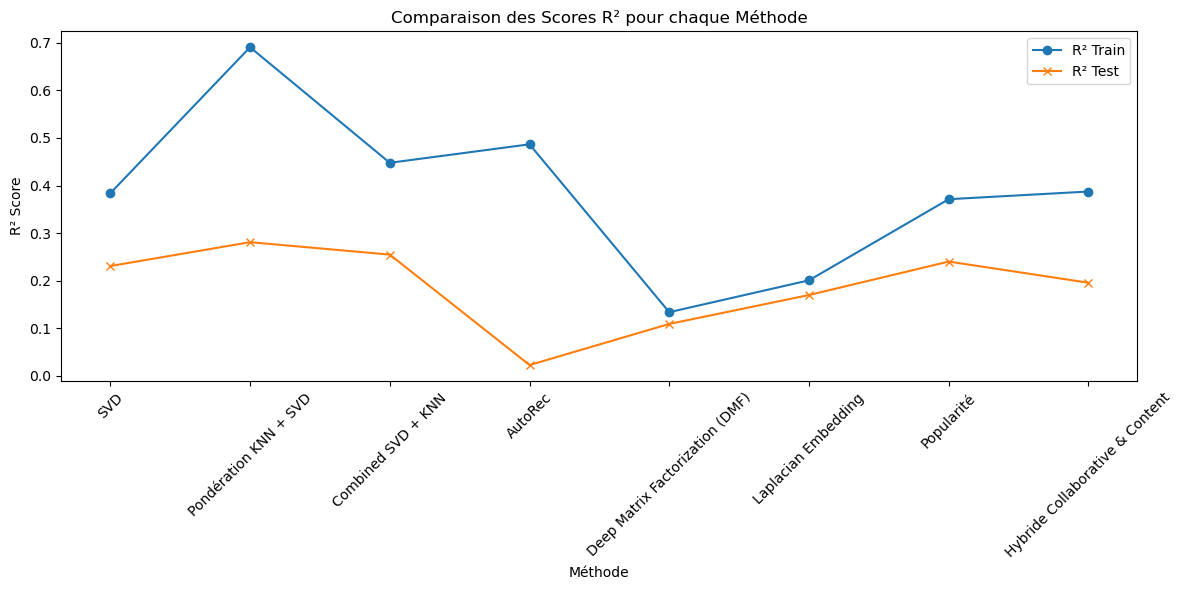

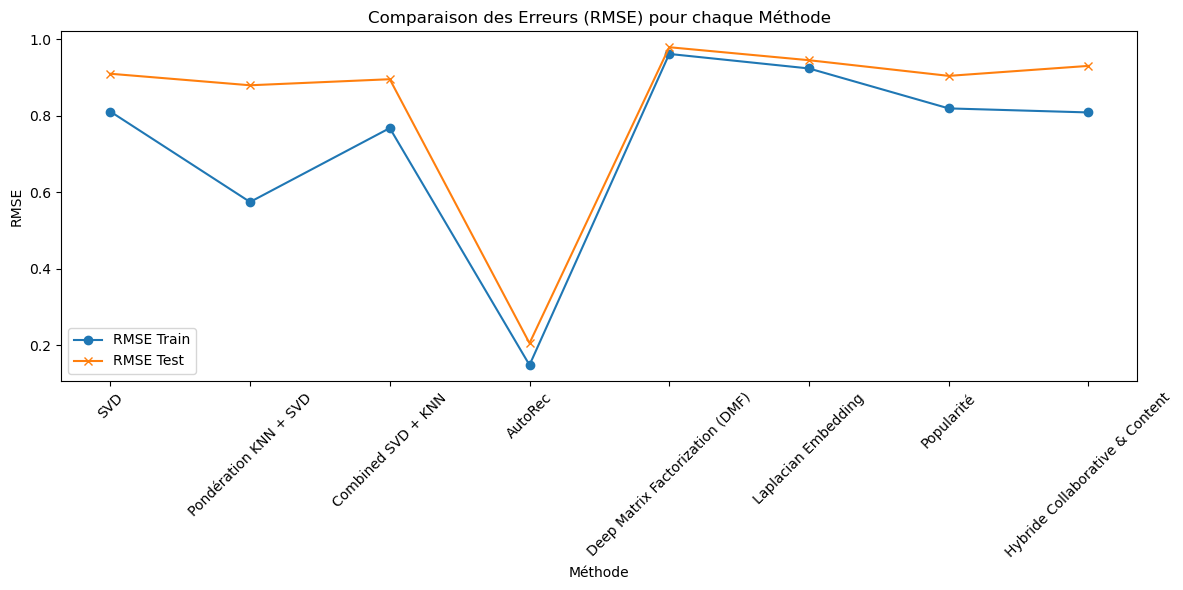

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Données pour R² et RMSE
# Exemple : Charger les données R² dans un DataFrame
df_r2 = pd.DataFrame([
    {"Méthode": "SVD", "R² Train": r2_with_mask_train_svd, "R² Test": r2_with_mask_test_svd},
    {"Méthode": "Pondération KNN + SVD", "R² Train": r2_train_pond_knn_svd, "R² Test": r2_test_pond_knn_svd},
    {"Méthode": "Combined SVD + KNN", "R² Train": r2_train_combined_svd_knn, "R² Test": r2_test_combined_svd_knn},
    {"Méthode": "AutoRec", "R² Train": r2_train_autorec, "R² Test": r2_test_autorec},
    {"Méthode": "Deep Matrix Factorization (DMF)", "R² Train": r2_train_dmf, "R² Test": r2_test_dmf},
    {"Méthode": "Laplacian Embedding", "R² Train": r2_train_laplacian, "R² Test": r2_test_laplacian},
    {"Méthode": "Popularité", "R² Train": r2_train_popularity, "R² Test": r2_test_popularity},
    {"Méthode": "Hybride Collaborative & Content", "R² Train": r2_train_hybrid, "R² Test": r2_test_hybrid}
])

df_rmse = pd.DataFrame([
    {"Méthode": "SVD", "RMSE Train": rmse_with_mask_train_svd, "RMSE Test": rmse_with_mask_test_svd},
    {"Méthode": "Pondération KNN + SVD", "RMSE Train": rmse_train_pond_knn_svd, "RMSE Test": rmse_test_pond_knn_svd},
    {"Méthode": "Combined SVD + KNN", "RMSE Train": rmse_train_combined_svd_knn, "RMSE Test": rmse_test_combined_svd_knn},
    {"Méthode": "AutoRec", "RMSE Train": rmse_train_autorec, "RMSE Test": rmse_test_autorec},
    {"Méthode": "Deep Matrix Factorization (DMF)", "RMSE Train": rmse_train_dmf, "RMSE Test": rmse_test_dmf},
    {"Méthode": "Laplacian Embedding", "RMSE Train": rmse_train_laplacian, "RMSE Test": rmse_test_laplacian},
    {"Méthode": "Popularité", "RMSE Train": rmse_train_popularity, "RMSE Test": rmse_test_popularity},
    {"Méthode": "Hybride Collaborative & Content", "RMSE Train": rmse_train_hybrid, "RMSE Test": rmse_test_hybrid}
])

# Tracer le R² pour chaque méthode
plt.figure(figsize=(12, 6))
plt.plot(df_r2["Méthode"], df_r2["R² Train"], marker='o', label="R² Train")
plt.plot(df_r2["Méthode"], df_r2["R² Test"], marker='x', label="R² Test")
plt.xlabel("Méthode")
plt.ylabel("R² Score")
plt.title("Comparaison des Scores R² pour chaque Méthode")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Tracer le RMSE pour chaque méthode
plt.figure(figsize=(12, 6))
plt.plot(df_rmse["Méthode"], df_rmse["RMSE Train"], marker='o', label="RMSE Train")
plt.plot(df_rmse["Méthode"], df_rmse["RMSE Test"], marker='x', label="RMSE Test")
plt.xlabel("Méthode")
plt.ylabel("RMSE")
plt.title("Comparaison des Erreurs (RMSE) pour chaque Méthode")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


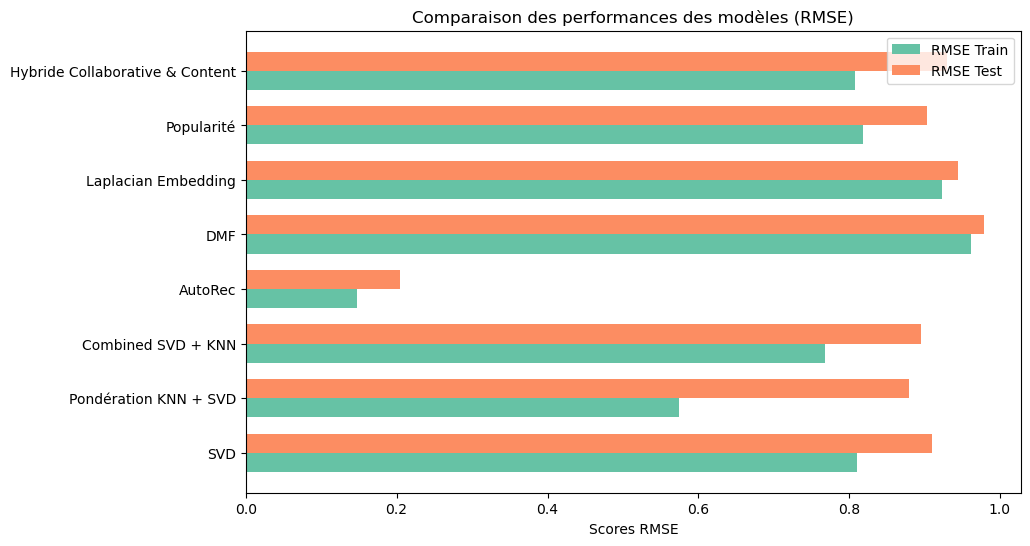

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des méthodes pour l'affichage
methods = ["SVD", "Pondération KNN + SVD", "Combined SVD + KNN", 
           "AutoRec", "DMF", "Laplacian Embedding", "Popularité", "Hybride Collaborative & Content"]

# RMSE Train et Test
rmse_train = [rmse_with_mask_train_svd, rmse_train_pond_knn_svd, rmse_train_combined_svd_knn, 
              rmse_train_autorec, rmse_train_dmf, rmse_train_laplacian, rmse_train_popularity, rmse_train_hybrid]
rmse_test = [rmse_with_mask_test_svd, rmse_test_pond_knn_svd, rmse_test_combined_svd_knn, 
             rmse_test_autorec, rmse_test_dmf, rmse_test_laplacian, rmse_test_popularity, rmse_test_hybrid]

# Création de la figure pour RMSE
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.35

# Position des barres sur l'axe des y
index = np.arange(len(methods))

# Création des barres pour RMSE Train et Test
bar1 = ax.barh(index - bar_width/2, rmse_train, bar_width, label="RMSE Train", color="#66c2a5")
bar2 = ax.barh(index + bar_width/2, rmse_test, bar_width, label="RMSE Test", color="#fc8d62")

# Ajout des labels et du titre
ax.set_xlabel("Scores RMSE")
ax.set_title("Comparaison des performances des modèles (RMSE)")
ax.set_yticks(index)
ax.set_yticklabels(methods)

# Affichage de la légende
ax.legend()

# Affichage du graphique
plt.show()


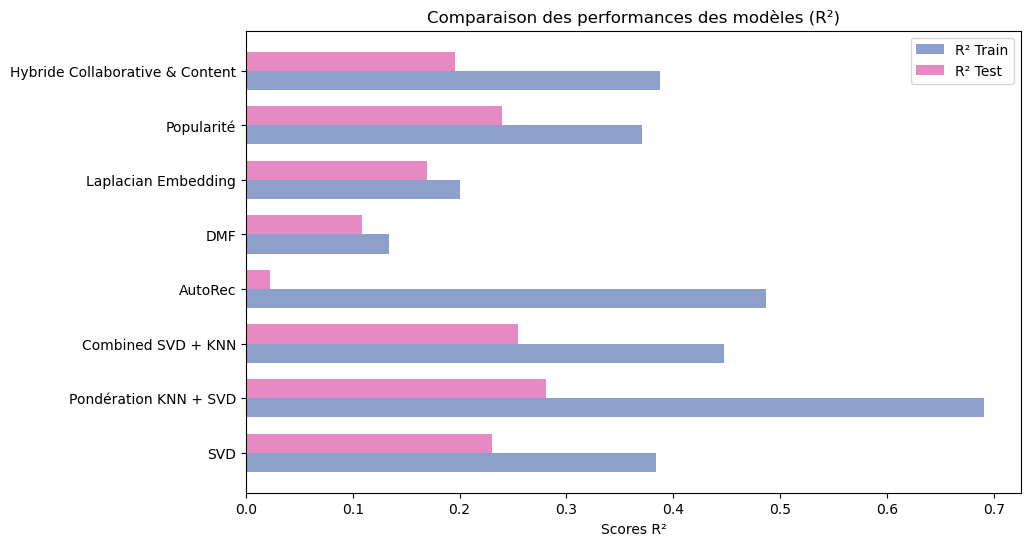

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des méthodes pour l'affichage
methods = ["SVD", "Pondération KNN + SVD", "Combined SVD + KNN", 
           "AutoRec", "DMF", "Laplacian Embedding", "Popularité", "Hybride Collaborative & Content"]

# R² Train et Test
r2_train = [r2_with_mask_train_svd, r2_train_pond_knn_svd, r2_train_combined_svd_knn, 
            r2_train_autorec, r2_train_dmf, r2_train_laplacian, r2_train_popularity, r2_train_hybrid]
r2_test = [r2_with_mask_test_svd, r2_test_pond_knn_svd, r2_test_combined_svd_knn, 
           r2_test_autorec, r2_test_dmf, r2_test_laplacian, r2_test_popularity, r2_test_hybrid]

# Création de la figure pour R²
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.35

# Position des barres sur l'axe des y
index = np.arange(len(methods))

# Création des barres pour R² Train et Test
bar1 = ax.barh(index - bar_width/2, r2_train, bar_width, label="R² Train", color="#8da0cb")
bar2 = ax.barh(index + bar_width/2, r2_test, bar_width, label="R² Test", color="#e78ac3")

# Ajout des labels et du titre
ax.set_xlabel("Scores R²")
ax.set_title("Comparaison des performances des modèles (R²)")
ax.set_yticks(index)
ax.set_yticklabels(methods)

# Affichage de la légende
ax.legend()

# Affichage du graphique
plt.show()
